<b>Problem Description</b><br>
Create a word-document matrix (A) from a text dataset. If the vocabulary (set of unique words) size is M and the number of documents is N, then the size of this matrix will be M X N. Use numpy data structures to create and manipulate this matrix.<br>

Dataset<br>
This dataset has 20 short text files. 

<b>1. Show the matrix A: report M and N</b>

In [1]:
cd /Users/amitparulekar/Desktop/Python Code/Assignment1_data

/Users/amitparulekar/Desktop/Python Code/Assignment1_data


In [2]:
import pandas as pd
import os
from sklearn.feature_extraction.text import CountVectorizer
import glob
import numpy as np

data = []
for filename in glob.glob('*.txt'):
    with open(filename,encoding="utf8", errors='ignore') as f:
        data.append(f.read())
        
data = np.array(data)

vec = CountVectorizer()
X = vec.fit_transform(data)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
df1=df.T

columns = ['Doc1','Doc2','Doc3','Doc4','Doc5','Doc6','Doc7','Doc8','Doc9','Doc10',
               'Doc11','Doc12','Doc13','Doc14','Doc15','Doc16','Doc17','Doc18','Doc19','Doc20']

df1.columns = columns
df1
df1.head(10)

,Doc1,Doc2,Doc3,Doc4,Doc5,Doc6,Doc7,Doc8,Doc9,Doc10,Doc11,Doc12,Doc13,Doc14,Doc15,Doc16,Doc17,Doc18,Doc19,Doc20
000,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
07,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
100,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
150,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
17,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
185,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1970s,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


<b>2. Visualize the matrix: Use heatmap like visualization to display the word-document matrix (higher frequency should be denoted by a darker shade)</b>

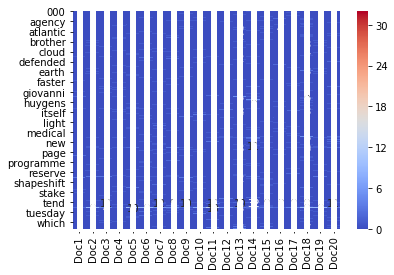

In [9]:
import seaborn as sns
sns.heatmap(df1, cmap='coolwarm', annot=True, fmt="")

<b>3. Using the matrix compute TF-IDF scores for each word</b>

In [4]:
from sklearn.feature_extraction.text import TfidfTransformer
#instantiate CountVectorizer() 
cv=CountVectorizer() 
 
# this steps generates word counts for the words in your docs 
word_count_vector=cv.fit_transform(data)
#word_count_vector.T
#words.shape
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(word_count_vector)
# print idf values 
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"]) 
 
# sort ascending 
df_idf.sort_values(by=['idf_weights'], ascending=False)

,idf_weights
leaving,3.351375
necessarily,3.351375
moon,3.351375
movement,3.351375
moves,3.351375
mr,3.351375
munster,3.351375
musk,3.351375
my,3.351375
named,3.351375


<b>4. Using cosine similarity find the 3 most similar documents of "10.txt"</b>

In [5]:
from sklearn.metrics.pairwise import cosine_similarity
df2= cosine_similarity(df, df)
df3 = pd.DataFrame(df2)
df3.columns = columns
df3.index = columns
df4=df3.iloc[9]
df4.sort_values(ascending=False)[0:4]

Doc10    1.000000
Doc6     0.594796
Doc11    0.496034
Doc2     0.453141
Name: Doc10, dtype: float64

<b>Response: Documents that are most similar to Document 10 are Document 6, 11 and 2.</b>

<b>5. Using matrix manipulation and numpy create a new matrix B of size N X N, where Bij will represent the number of common words between document i and j. Note: the diagonal of B should always have the highest value</b>

In [6]:
data[0]

"In 10 days, NASA's Cassini spacecraft will nose-dive into Saturn and burn up in the planet's atmosphere. It's the final, suicidal step of a months-long dance through Saturn's rings that has given scientists an unprecedented view of the sixth planet from the sun. It's also the end of a mission that has revolutionized our understanding of Saturn and opened our eyes to two worlds that could be home to alien life - the moons Titan and Enceladus.\n\nIt really is the end of an era. And Cassini fans are devastated."

In [7]:
B = np.zeros((20, 20), dtype=int)
for i in range(len(B)):
    for j in range(len(B)):
        B[i][j] = len(set(data[i].split()) & set(data[j].split()))
B

array([[ 67,  12,  14,  13,  14,  18,  12,  13,  15,  10,  12,  12,   7,
         20,  10,  13,   8,  13,  12,  13],
       [ 12, 100,  20,  12,  20,  21,  16,  16,   9,  19,  15,  12,  13,
         14,  15,  15,  11,  20, 100,  17],
       [ 14,  20,  91,  13,  14,  16,  18,  17,   9,  15,  16,  11,  16,
         20,  13,  17,  11,  16,  20,  15],
       [ 13,  12,  13,  99,  16,  15,  14,  12,  14,  13,  18,  13,  16,
         19,  11,  12,  11,  15,  12,  13],
       [ 14,  20,  14,  16, 121,  20,  13,  19,   9,  13,  16,  17,  14,
         15,  16,  15,  10,  25,  20,  19],
       [ 18,  21,  16,  15,  20, 120,  15,  15,  12,  35,  17,  16,  13,
         17,  13,  16,  12,  21,  21,  20],
       [ 12,  16,  18,  14,  13,  15, 119,  18,  13,  16,  14,  17,  20,
         21,  15,  18,  11,  15,  16,  18],
       [ 13,  16,  17,  12,  19,  15,  18, 102,  13,  11,  18,   9,  13,
         18,  19,  15,  10,  26,  16,  21],
       [ 15,   9,   9,  14,   9,  12,  13,  13,  96,  14,  14,  

In [8]:
B_df = pd.DataFrame(data=B, index=columns, columns=columns)
B_df

,Doc1,Doc2,Doc3,Doc4,Doc5,Doc6,Doc7,Doc8,Doc9,Doc10,Doc11,Doc12,Doc13,Doc14,Doc15,Doc16,Doc17,Doc18,Doc19,Doc20
Doc1,67,12,14,13,14,18,12,13,15,10,12,12,7,20,10,13,8,13,12,13
Doc2,12,100,20,12,20,21,16,16,9,19,15,12,13,14,15,15,11,20,100,17
Doc3,14,20,91,13,14,16,18,17,9,15,16,11,16,20,13,17,11,16,20,15
Doc4,13,12,13,99,16,15,14,12,14,13,18,13,16,19,11,12,11,15,12,13
Doc5,14,20,14,16,121,20,13,19,9,13,16,17,14,15,16,15,10,25,20,19
Doc6,18,21,16,15,20,120,15,15,12,35,17,16,13,17,13,16,12,21,21,20
Doc7,12,16,18,14,13,15,119,18,13,16,14,17,20,21,15,18,11,15,16,18
Doc8,13,16,17,12,19,15,18,102,13,11,18,9,13,18,19,15,10,26,16,21
Doc9,15,9,9,14,9,12,13,13,96,14,14,11,14,19,17,13,13,12,9,13
Doc10,10,19,15,13,13,35,16,11,14,104,18,15,14,18,10,18,11,14,19,18


<b>Submission
Upload the final code file either in .py or .ipynb format. Make sure you properly comment your code and state all you assumptions.</b>